In [2]:
#BUILD PCA

In [8]:
#why do dimensionality reduction?
# 1 - space efficiency
#2 - computing efficiency
#3 - visualization ( so we can analyze by human eye)

#We will build PCA and then compare it to theT-SNZ and LDA ( 3 DR methods total)

In [9]:
import numpy as np #math
np.random.seed(1) # good for debugging

In [10]:
#step 1 = Create our dataset

mu_vec1 = np.array([0,0,0,]) #sample mean
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print(class1_sample)
# 3 x 20 3 columns with 20 rows - 3 dimensional matrix
#covariant - how much does one variable vary in relation to anothe variable

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


In [11]:
# create two classes
mu_vec2 = np.array([1,1,1,]) #sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print(class1_sample)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


Populating the interactive namespace from numpy and matplotlib


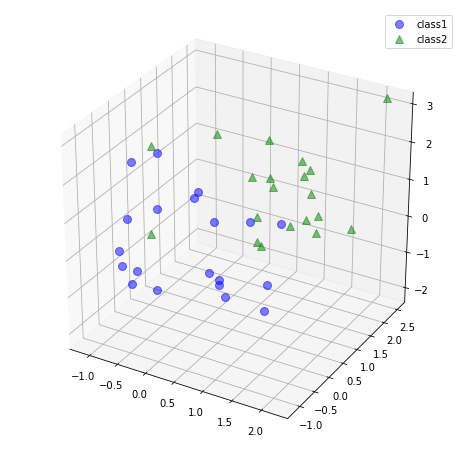

In [12]:
%pylab inline

#plotting
from matplotlib import pyplot as plt

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

In [13]:
#step 3 - merge the data into one bigass dataset

In [16]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [17]:
all_samples #now a 3 x 40 dataset

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

Populating the interactive namespace from numpy and matplotlib


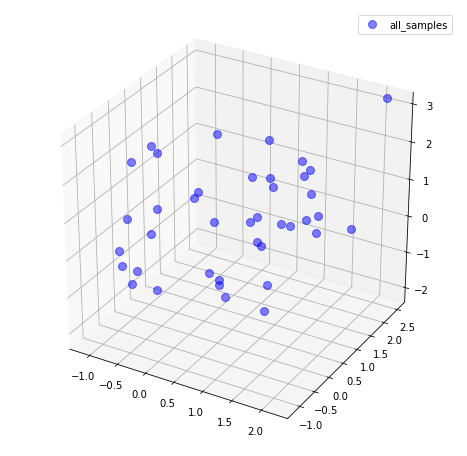

In [24]:
%pylab inline

#plotting
from matplotlib import pyplot as plt

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='all_samples')

ax.legend(loc='upper right')

plt.show()

In [25]:
all_samples.T # "T" Transpose flips our data

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 ],
       [-0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218],
       [ 0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032],
       [-0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341],
       [ 0.93110208,  0.28558733,  0.88514116],
       [ 0.24560206,  2.25286816,  1.512

In [32]:
#step 4 - compute the dimensional mean vector, it will help compute the covariance matrix
#mean for each feature(average value of all values)
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
#3d mean vector
mean_vector = np.array([[mean_x], [mean_y], [mean_z]])
print(mean_vector)

[[ 0.41667492]
 [ 0.69848315]
 [ 0.49242335]]


In [33]:
#step 5 - compute the covariance matrix
#measures the relationship between all variables
cov_mat = np.zeros([3,3]) #create empty 3x3 array of zeros
print(cov_mat) #visualize array

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [37]:
#covariane matrix models relationship between our variables. the variance between each
#http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/anova/anova-statistics/what-is-the-variance-covariance-matrix/
#http://stats.seandolinar.com/making-a-covariance-matrix-in-r/
#Variance is the degree by which a random vairable changes with respect to its expected value
#Covariance is the degree by which two different random variables change with respect to each other. 
#measures relationship between each feature
#WHY do we multiply two matrices together? - Because it gives us a more generalize value
#formula for covariance matrix - C =(n -1)^-1 * D^T * D
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.9868668   0.26943262  0.2855759 ]
 [ 0.26943262  0.92914135  0.30682016]
 [ 0.2855759   0.30682016  1.27528118]]


In [43]:
#step 6 - compute eigenvectors and eigenvalues
#eigen vector is a direction by which some data is going
#use numpys eigenvalue linear function
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('values')
print(eig_val)
print('vectors')
print(eig_vec)

values
[ 1.67100943  0.83832597  0.68195393]
vectors
[[-0.49210223 -0.64670286  0.58276136]
 [-0.47927902 -0.35756937 -0.8015209 ]
 [-0.72672348  0.67373552  0.13399043]]


In [48]:
#step 7 = create eigenpair from both and sort them
#create eigen pairs with numpy absolute funcion(abs) - make them positive(because its easier)
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
             for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples(3 dimensions) from high to low
eig_pairs.sort()
eig_pairs.reverse()

for i in eig_pairs:
    print(i[0])

1.67100943053
0.838325973416
0.68195393031


In [51]:
#step 8 = choose k eigenvectors
#stacking array in sequence horizontally with hstack function
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W(2 dimensional matrix):\n', matrix_w)

Matrix W(2 dimensional matrix):
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [53]:
#step 9 transform our dat using this eigenpair
#computing the dot product between original dataset and new eigen pair matrix. Gives us 2 features instead of 3
transformed = matrix_w.T.dot(all_samples)
print(transformed)

[[-0.12230714  1.78582073 -0.72564846  0.91911067 -0.48120545  1.26186049
   0.49974121 -1.36060904 -0.02630959  0.20346559  1.02990798  0.74684543
  -0.76873682  0.37184198 -0.48040292 -1.30433953 -0.57308381  0.9748035
  -0.78806782 -1.23832629 -2.30009539 -1.73062935 -4.57170736  0.04785487
  -2.42616804 -1.15792646 -2.01497976 -1.98672036 -1.36534078 -2.76311357
  -2.1041081  -1.64296088 -1.09921946 -2.71718701 -1.38545546 -1.44331476
  -0.58485289 -1.63411201 -1.21353834 -1.73760916]
 [-1.18757151 -1.16617976 -0.64124251 -1.74952646  1.10969495  0.18151348
  -0.97722286 -0.72412904 -0.42090149  1.05827266  0.12619324  0.77808138
   1.75701561 -1.00931473 -0.08774954  1.75869787 -0.09616466  0.4009659
   0.49058694 -0.10791262  0.05492635 -0.3633537  -0.13330484  0.74907576
  -0.53466984  1.6445517  -0.90160187  0.00885182 -0.95318056  0.14270558
  -1.4249294  -0.01678979 -0.54147105  0.20291779 -1.54140242 -1.3474191
  -1.09515232 -1.41599875 -0.11407398  0.58889408]]


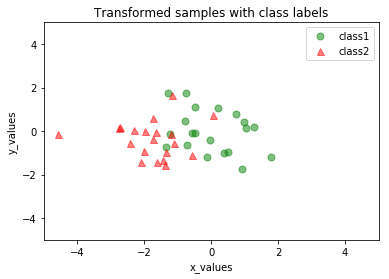

In [54]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [ ]:
#^Two dimensional data instead of 3 dim now